# black friday dataset eda and feature engineering 
cleaning and preparing data for model training

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importing dataset
df_train=pd.read_csv("C:\\Users\\ancha\\Downloads\\archive\\train.csv")

In [4]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


HERE WE WANT TO BUILD A MODEL
WANTS TO UNDERSTAND THE CUSTOMER PURCHASE 

In [5]:
df_test=pd.read_csv("C:\\Users\\ancha\\Downloads\\archive\\test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
df=pd.concat([df_train,df_test])

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [9]:
df.drop(['User_ID'],axis=1,inplace=True)

In [10]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
##handle categorical features
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [13]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
##pd.get_dummies(df['Age'],drop_first=True)

In [17]:
df['Age']=df['Age'].map({'0-17':1, '55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2})

In [18]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN


In [26]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True,dtype=int)

In [27]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C,B,C,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0,0,0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0,0,0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0,0,0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0,0,0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1,0,1,0,1


In [34]:
#drop city category feature
df.drop('City_Category',axis=1,inplace=True)

In [37]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,C,C,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,0,0,0
233595,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,0,0,0
233596,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,0,0,0
233597,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,1,1,1


In [38]:
df.drop('C',axis=1,inplace=True)

In [39]:
df=pd.concat([df,df_city],axis=1)

In [40]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,0,1


In [41]:
##missing values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [46]:
##focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [47]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [51]:
df_mode=df['Product_Category_2'].mode()[0]

In [67]:
#replace the missing value with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df_mode)

In [68]:
df['Product_Category_2'].isnull().sum()

0

In [58]:
##for product category 3 replace missing value
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [60]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [61]:
df_mode=df['Product_Category_3'].mode()[0]

In [62]:
df_mode

16.0

In [65]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df_mode)

In [66]:
df['Product_Category_3'].isnull().sum()

0

In [69]:
df.shape

(783667, 12)

In [70]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(2), int64(5), object(2)
memory usage: 87.9+ MB


In [80]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [81]:
#convert object stat in current years in integer
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 84.9+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

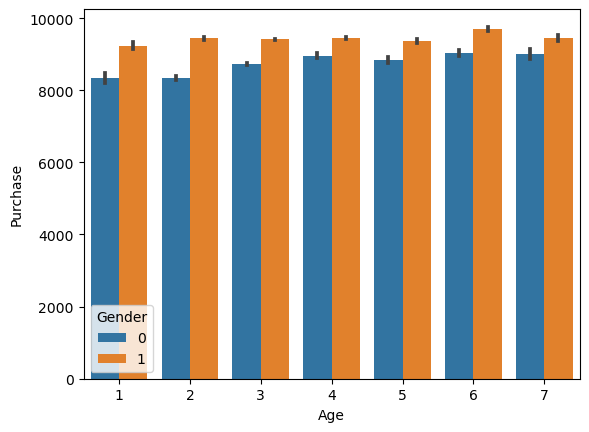

In [84]:
#visualization of age vs purchase
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

purchasing of men over women is high over the ages are uniform only

<Axes: xlabel='Occupation', ylabel='Purchase'>

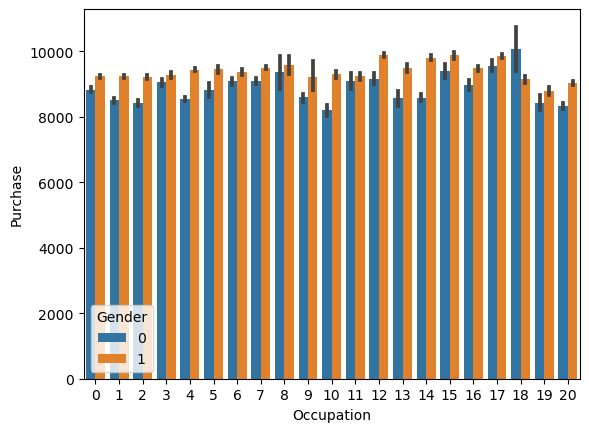

In [85]:
##visualization of purchase with occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

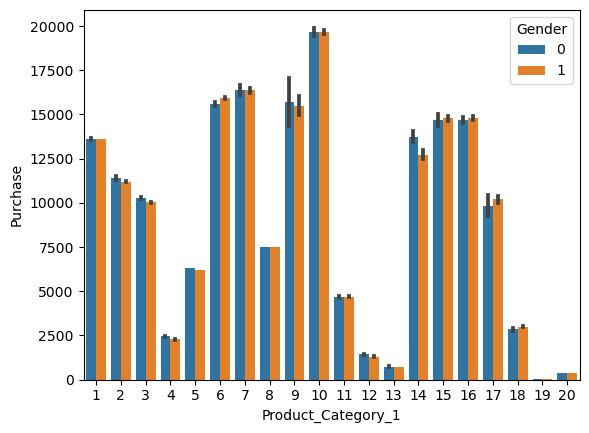

In [86]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

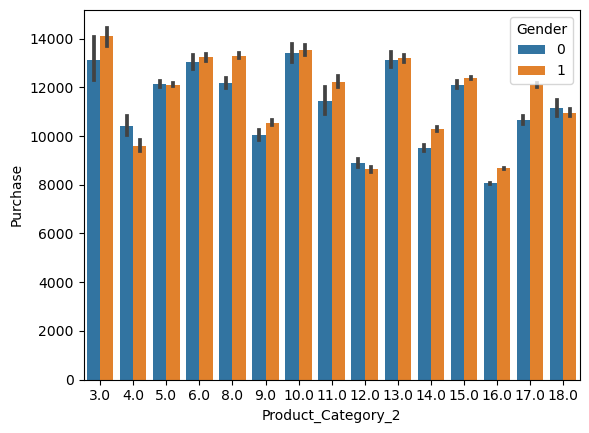

In [87]:
sns.barplot(x='Product_Category_2',y='Purchase', hue='Gender',data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

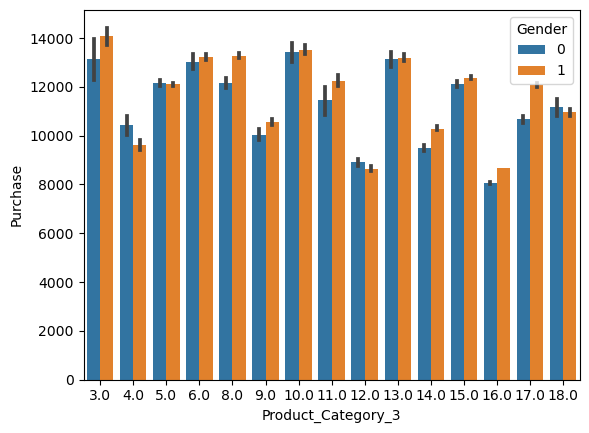

In [88]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

In [89]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,16.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,14.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,16.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,16.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,16.0,16.0,7969.0,0,1


In [90]:
##feature scaling
df_test=df[df['Purchase'].isnull()]

In [91]:
df_train=df[~df['Purchase'].isnull()]

In [99]:
X=df_train[:-1]

In [103]:
X=df_train.drop('Purchase',axis=1)

In [104]:
X.shape

(550068, 11)

In [101]:
y=df_train['Purchase']

In [102]:
y.shape

(550068,)

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.33, random_state=42)